In [7]:
# Import necessary library
import pandas as pd

# Load the data
df = pd.read_csv(r"C:\Users\popov\BostonHousingAnalysis\data\BostonHousing.csv") 
# Display the first few rows of the data to inspect it
df.head()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the features and the target variable
X = df.drop('medv', axis=1)
y = df['medv']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(16, activation='relu'),                                         # Hidden layer
    Dense(1)                                                              # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the architecture of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                448       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model
history = model.fit(X_train_scaled, y_train, 
                    batch_size=32, 
                    epochs=200, 
                    validation_data=(X_test_scaled, y_test), 
                    verbose=1)

# The 'history' object contains the training history, including loss and metrics


Epoch 1/200
13/13 [==============================] - 1s 29ms/step - loss: 584.1064 - val_loss: 501.2096
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 563.4791 - val_loss: 479.4659
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 539.3030 - val_loss: 454.8833
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 510.7088 - val_loss: 426.3474
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 478.0039 - val_loss: 393.0200
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 438.4078 - val_loss: 354.0049
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 390.0248 - val_loss: 307.1109
Epoch 8/200
13/13 [==============================] - 0s 7ms/step - loss: 334.0975 - val_loss: 254.1708
Epoch 9/200
13/13 [==============================] - 0s 7ms/step - loss: 272.4454 - val_loss: 199.6728
Epoch 10/200
13/13 [==============================] - 0s 7ms/step - loss

13/13 [==============================] - 0s 8ms/step - loss: 9.6995 - val_loss: 11.5018
Epoch 82/200
13/13 [==============================] - 0s 9ms/step - loss: 9.6450 - val_loss: 11.4479
Epoch 83/200
13/13 [==============================] - 0s 8ms/step - loss: 9.6540 - val_loss: 11.4931
Epoch 84/200
13/13 [==============================] - 0s 8ms/step - loss: 9.5073 - val_loss: 11.3393
Epoch 85/200
13/13 [==============================] - 0s 8ms/step - loss: 9.4895 - val_loss: 11.3521
Epoch 86/200
13/13 [==============================] - 0s 8ms/step - loss: 9.4154 - val_loss: 11.3780
Epoch 87/200
13/13 [==============================] - 0s 8ms/step - loss: 9.3716 - val_loss: 11.3620
Epoch 88/200
13/13 [==============================] - 0s 9ms/step - loss: 9.3002 - val_loss: 11.2307
Epoch 89/200
13/13 [==============================] - 0s 8ms/step - loss: 9.2846 - val_loss: 11.2727
Epoch 90/200
13/13 [==============================] - 0s 8ms/step - loss: 9.2615 - val_loss: 11.1882
Epo

13/13 [==============================] - 0s 8ms/step - loss: 6.6871 - val_loss: 10.5981
Epoch 162/200
13/13 [==============================] - 0s 8ms/step - loss: 6.7149 - val_loss: 10.5823
Epoch 163/200
13/13 [==============================] - 0s 8ms/step - loss: 6.6886 - val_loss: 10.5692
Epoch 164/200
13/13 [==============================] - 0s 8ms/step - loss: 6.6144 - val_loss: 10.6790
Epoch 165/200
13/13 [==============================] - 0s 8ms/step - loss: 6.6455 - val_loss: 10.6263
Epoch 166/200
13/13 [==============================] - 0s 8ms/step - loss: 6.5328 - val_loss: 10.5586
Epoch 167/200
13/13 [==============================] - 0s 9ms/step - loss: 6.5673 - val_loss: 10.6989
Epoch 168/200
13/13 [==============================] - 0s 8ms/step - loss: 6.5184 - val_loss: 10.5885
Epoch 169/200
13/13 [==============================] - 0s 8ms/step - loss: 6.4784 - val_loss: 10.6402
Epoch 170/200
13/13 [==============================] - 0s 8ms/step - loss: 6.5696 - val_loss: 10

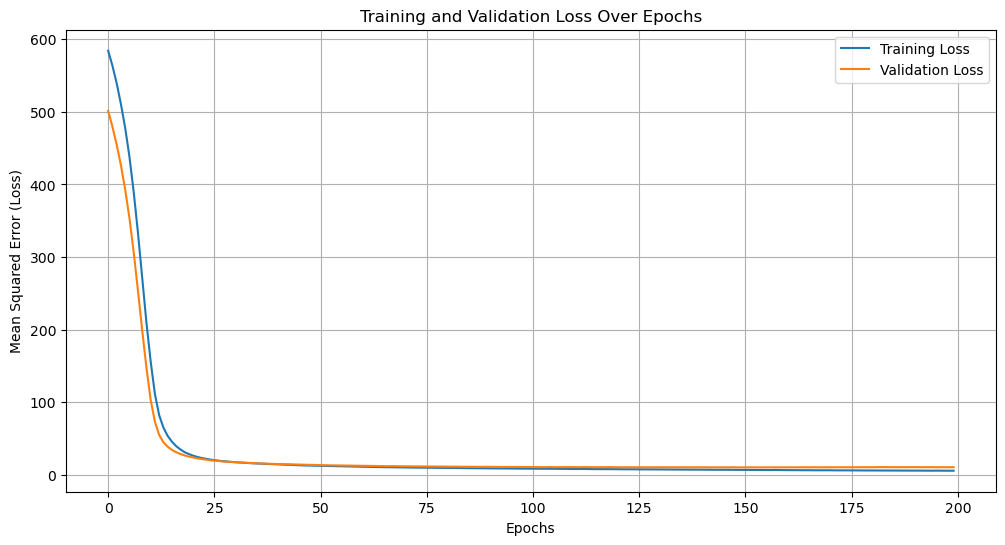

In [11]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train_scaled, y_train, 
    batch_size=32, 
    epochs=200, 
    validation_data=(X_test_scaled, y_test), 
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/200
13/13 [==============================] - 0s 13ms/step - loss: 5.8403 - val_loss: 10.7378
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 5.8179 - val_loss: 10.7528
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 5.8339 - val_loss: 10.7699
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 5.7649 - val_loss: 10.8091
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 5.8218 - val_loss: 10.7612
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 5.7736 - val_loss: 10.7289
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 5.7118 - val_loss: 10.7708
Epoch 8/200
13/13 [==============================] - 0s 7ms/step - loss: 5.7341 - val_loss: 10.7516
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 5.7682 - val_loss: 10.8099
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 5.7067 - val_loss: 10.745

In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict the house prices on the test set
y_pred = model.predict(X_test_scaled)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.2f}")


4/4 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE) on Test Set: 3.23


4/4 [==============================] - 0s 2ms/step


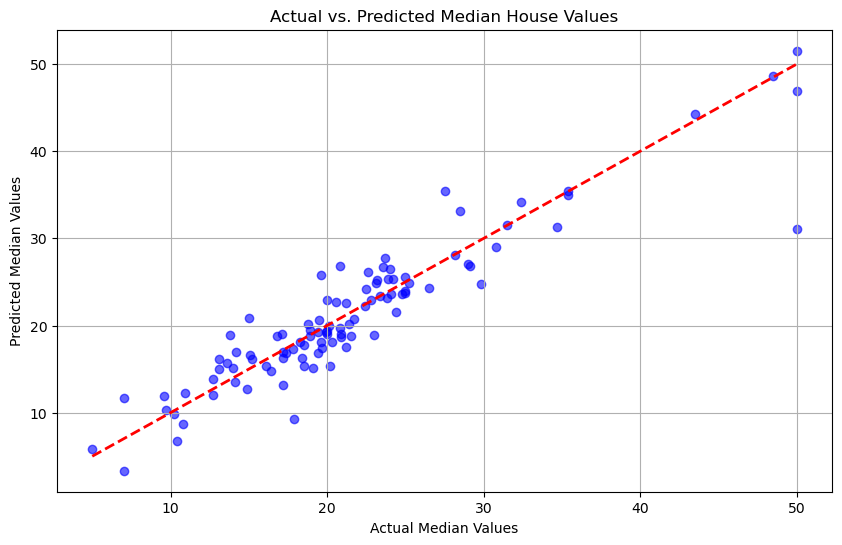

In [14]:
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual Median Values')
plt.ylabel('Predicted Median Values')
plt.title('Actual vs. Predicted Median House Values')
plt.grid(True)
plt.show()
